# Importando Modulos Requeridos


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# default settings para plotear Redes
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

# Tarea

Juntense en grupos. Tienen una semana para entregar esta tarea. Para ambos datasets `example_1.txt` y `example_2.txt`. Cada grupo deberá cargar el edge list que corresponde y hacer lo siguiente:

* Pregunta 1: Calcula todas las medidas básicas que se muestran arriba. Comente ¿Qué se puede sospechar acerca de la distribución de grados de la red solo en función de la media y los grados extremos?

* Pregunta 2: Graficar la distribución del grado en escala log-log. También graficarlo en escala lineal. Comente cómo encaja esto con el análisis de la pregunta 1.

* Pregunta 3: Dibuje la red utilizando los dos algoritmos de diseño que se muestran arriba. ¿Cómo se refljan en la apariencia de la red los hallazgos de las preguntas 1 y 2?

*Nota: Recuerden que SU interpretación de los resultados es lo más importante.*

# Tarea - Ejemplo_1

In [3]:
# lee una edge list desde el archivo'test.txt'
G = nx.read_edgelist('./example_1.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

In [4]:
# alternativa
print(len(G))

# Mejor
print(G.size())

########################
# cómo hacer formateo de strings
print("El grafo G tiene {0} nodos y {1} enlaces.".format(len(G), G.size()))

1000
2991
El grafo G tiene 1000 nodos y 2991 enlaces.


In [5]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [6]:
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  1000
Número de enlaces:  2991
-------
Grado promedio:  5.982
Grado promedio (alternativa de calculo) 5.982
-------
Grado mínimo:  3
Grado máximo:  98


In [7]:
degrees

[31,
 3,
 23,
 98,
 6,
 55,
 7,
 4,
 21,
 12,
 3,
 3,
 7,
 11,
 3,
 7,
 23,
 8,
 3,
 14,
 3,
 8,
 4,
 3,
 5,
 12,
 6,
 7,
 4,
 10,
 3,
 6,
 31,
 38,
 42,
 5,
 4,
 3,
 20,
 5,
 47,
 4,
 13,
 29,
 21,
 10,
 5,
 3,
 8,
 3,
 3,
 9,
 9,
 21,
 7,
 3,
 4,
 6,
 8,
 3,
 8,
 5,
 17,
 4,
 90,
 39,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 15,
 4,
 16,
 4,
 3,
 51,
 4,
 3,
 7,
 22,
 4,
 35,
 4,
 3,
 3,
 6,
 5,
 7,
 5,
 33,
 27,
 40,
 12,
 32,
 22,
 6,
 35,
 7,
 13,
 16,
 3,
 5,
 8,
 19,
 5,
 4,
 11,
 12,
 5,
 3,
 16,
 4,
 5,
 4,
 9,
 11,
 5,
 6,
 7,
 5,
 3,
 6,
 3,
 6,
 4,
 3,
 5,
 3,
 3,
 8,
 6,
 3,
 4,
 3,
 6,
 3,
 6,
 3,
 4,
 3,
 3,
 5,
 8,
 5,
 5,
 3,
 5,
 3,
 3,
 6,
 3,
 3,
 5,
 3,
 3,
 8,
 3,
 3,
 3,
 4,
 3,
 5,
 3,
 4,
 3,
 4,
 3,
 8,
 3,
 5,
 3,
 4,
 3,
 4,
 6,
 5,
 17,
 17,
 4,
 25,
 12,
 5,
 7,
 16,
 9,
 3,
 5,
 15,
 7,
 14,
 8,
 11,
 3,
 10,
 4,
 10,
 9,
 8,
 6,
 8,
 7,
 4,
 3,
 6,
 3,
 7,
 3,
 5,
 3,
 10,
 4,
 8,
 3,
 4,
 5,
 8,
 4,
 6,
 3,
 3,
 5,
 8,
 11,
 3,
 6,
 7,
 3,
 7,
 3,
 6,
 6,
 

## Viendo el promedio de grados y el grado minimo y maximo, se puede apreciar que la distribucion de aproxima mas a una aleatoria que a una de libre escala 

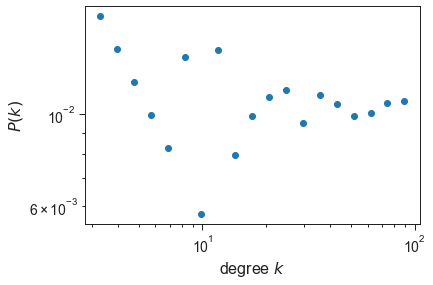

In [8]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(G, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

## Con este grafico se ve que aunque al comienzo la probabilidad baja con el valor del grado, se mantiene constante despues lo que muestra que no baja totalmente como en uno de libre escala pero tampoco es totalmente aleatorio, por lo que esta al medio de ambas distribuciones.

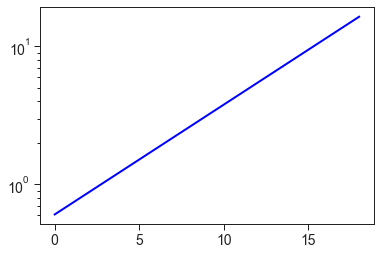

In [9]:
a = bin_edges[1:] - bin_edges[:-1]
ax = fig.add_subplot(2,1,1)
plt.semilogy(a, color='blue', lw=2)
# plt.plot(a, color='blue', lw=2)
plt.show()

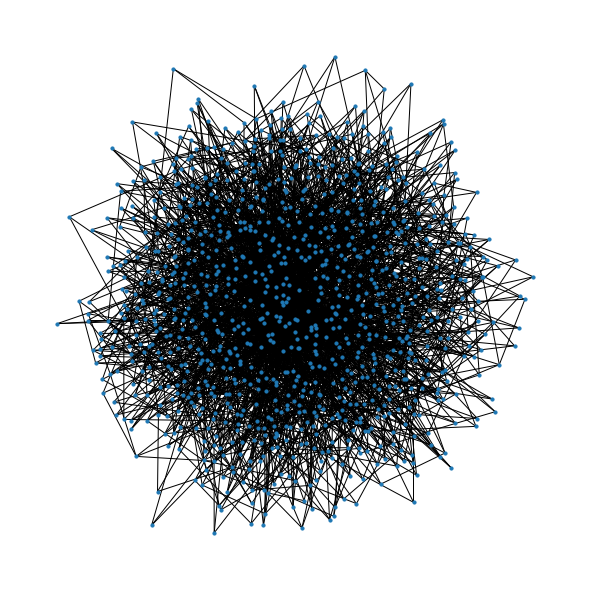

In [10]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(8,8))


nx.draw_spring(G, node_size=10)

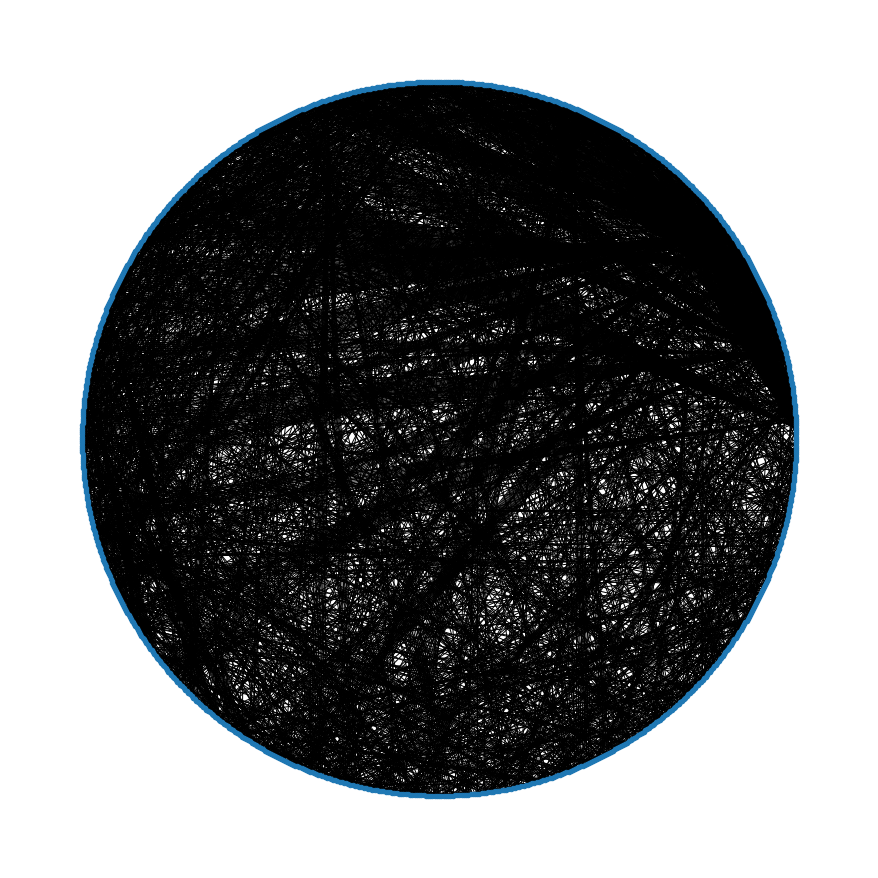

In [11]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(12,12))
nx.draw_circular(G, node_size=20)

## Viendo la primera red, se ve que al medio hay varios nodos que tienen muchas conexiones y este se va disminuyendo mientras va hacia fuera, y con la segunda red ya se nota que esta bien distribuida. Ambas redes reafirman el hecho de que la distribucion se encuentra entremedio de una aleatoria y de libre escala 

# Tarea - Ejemplo_2

In [12]:
# lee una edge list desde el archivo'test.txt'
G = nx.read_edgelist('./example_2.txt', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=' ', 
                     nodetype=int, 
                     encoding='utf-8')

In [13]:
# alternativa
print(len(G))

# Mejor
print(G.size())

########################
# cómo hacer formateo de strings
print("El grafo G tiene {0} nodos y {1} enlaces.".format(len(G), G.size()))

197
1651
El grafo G tiene 197 nodos y 1651 enlaces.


In [14]:
N = len(G)
L = G.size()
degrees = list(dict(G.degree()).values())
kmin = min(degrees)
kmax = max(degrees)

In [15]:
print("Número de nodos: ", N)
print("Número de enlaces: ", L)
print('-------')
print("Grado promedio: ", 2*L/N) #Formula vista en clases (qué sucedía con las redes reales?)
print("Grado promedio (alternativa de calculo)", np.mean(degrees))
print('-------')
print("Grado mínimo: ", kmin)
print("Grado máximo: ", kmax)

Número de nodos:  197
Número de enlaces:  1651
-------
Grado promedio:  16.761421319796955
Grado promedio (alternativa de calculo) 16.761421319796955
-------
Grado mínimo:  1
Grado máximo:  43


## Esta red tiene una variedad mucho mas grande entre el promedio de grados y el minimo y maximo, por lo que podemos decir que esta se va a acercar mucho mas a una de libre escala

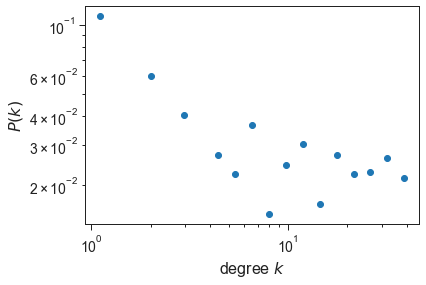

In [16]:
# Generamos 10 bins espaciados logaritmicamente entre kmin y kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)

# histograma de la data para esos bines
density, _ = np.histogram(G, bins=bin_edges, density=True)

fig = plt.figure(figsize=(6,4))

# "x" debe ser el punto medio (en escala LOG) de cada bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# # remuevo los limites derecho y superior 
# ax = plt.gca()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.yaxis.set_ticks_position('left')
# ax.xaxis.set_ticks_position('bottom')

# Muestra la gráfica
plt.show()

## Como se ve en el grafico, esta comienza arriba y empieza a decrecer. El descenso no es una linea recta exacta pero se nota que en general tiende a bajar. Esto reafirma la idea de que esta red se aproxima a una de libre escala

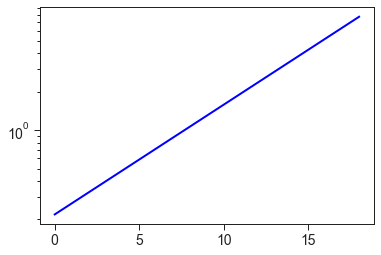

In [17]:
a = bin_edges[1:] - bin_edges[:-1]
ax = fig.add_subplot(2,1,1)
plt.semilogy(a, color='blue', lw=2)
# plt.plot(a, color='blue', lw=2)
plt.show()

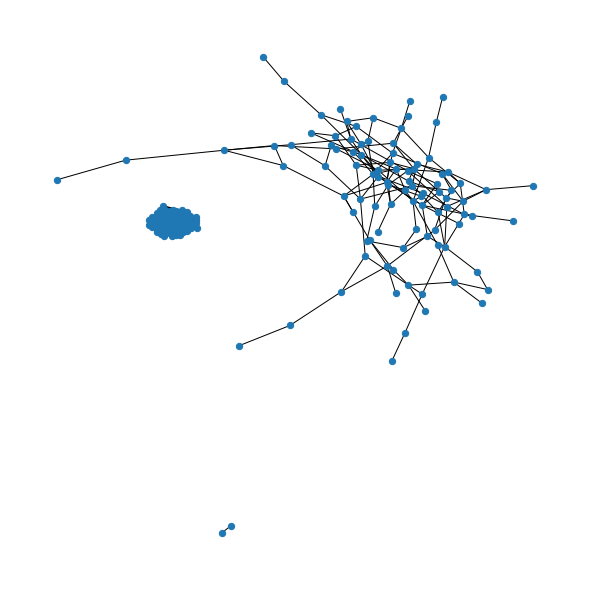

In [18]:
# Usando el algoritmo force-based o "spring" 
fig = plt.figure(figsize=(8,8))


nx.draw_spring(G, node_size=40)

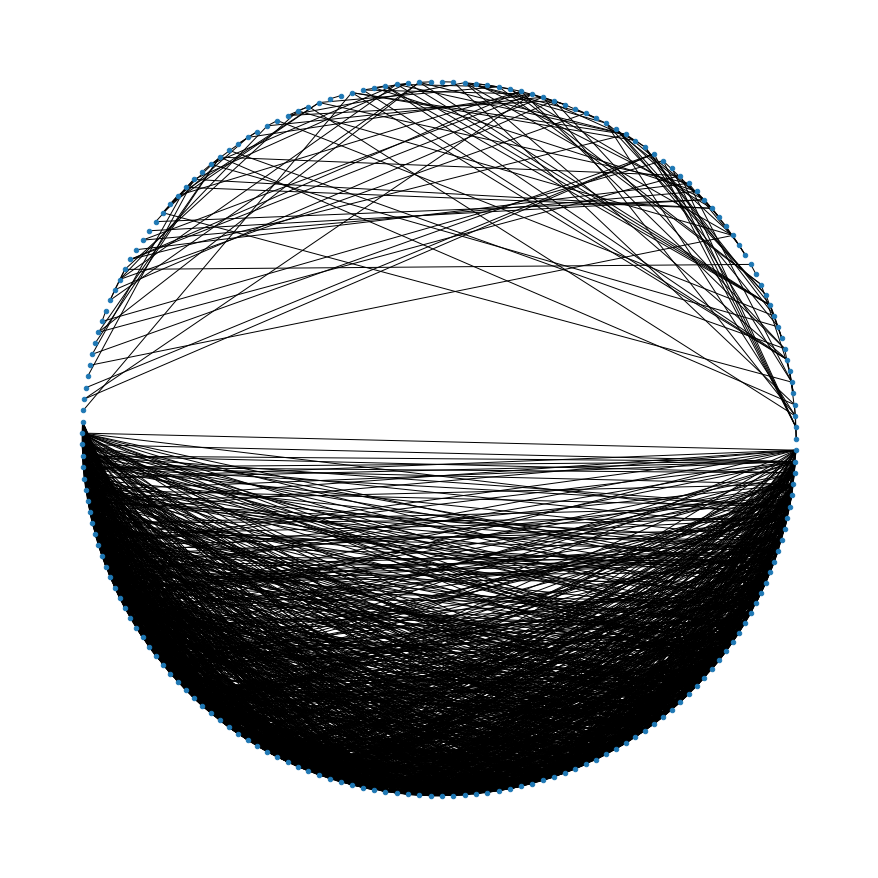

In [19]:
# usando el algoritmo circular 
fig = plt.figure(figsize=(12,12))
nx.draw_circular(G, node_size=20)

## Con estas dos redes visuales, ya queda claro viendo el primero en donde hay un cumulo de nodos con varias conexiones, mientras que el resto solo tiene una o dos. Y ya con la ultima red se ve que la parte de abajo esta llena de conexiones, mientras que la de arriba casi nada, viendo esto se ve que la cantidad de conexiones se concentran en al